WEEK 6 ASSIGNMENT

PROBLEM STATEMENT:

Train multiple machine learning models and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.
Implement hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV to optimize model parameters.
Analyze the results to select the best-performing model.


RESOURCES:

https://www.kdnuggets.com/hyperparameter-tuning-gridsearchcv-and-randomizedsearchcv-explained

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [30]:
print(df.columns.tolist())

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [31]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [32]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("Base Model Evaluation:")
print(results_df)

Base Model Evaluation:
                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.853261   0.900000  0.841121  0.869565
1           Random Forest  0.869565   0.887850  0.887850  0.887850
2  Support Vector Machine  0.875000   0.903846  0.878505  0.890995


In [36]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)

Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
param_dist_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

random_svc = RandomizedSearchCV(SVC(), param_dist_svc, n_iter=5, cv=5, scoring='f1', random_state=42)
random_svc.fit(X_train, y_train)
print("Best SVM Params:", random_svc.best_params_)

Best SVM Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


In [38]:
tuned_models = {
    'Tuned Random Forest': grid_rf.best_estimator_,
    'Tuned SVM': random_svc.best_estimator_
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))


Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


Tuned SVM Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.87      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [39]:
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

final_df = pd.DataFrame(results)
print("\nFinal Model Comparison:")
print(final_df.sort_values(by='F1 Score', ascending=False))


Final Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
2  Support Vector Machine  0.875000   0.903846  0.878505  0.890995
1           Random Forest  0.869565   0.887850  0.887850  0.887850
3     Tuned Random Forest  0.869565   0.895238  0.878505  0.886792
4               Tuned SVM  0.853261   0.870370  0.878505  0.874419
0     Logistic Regression  0.853261   0.900000  0.841121  0.869565


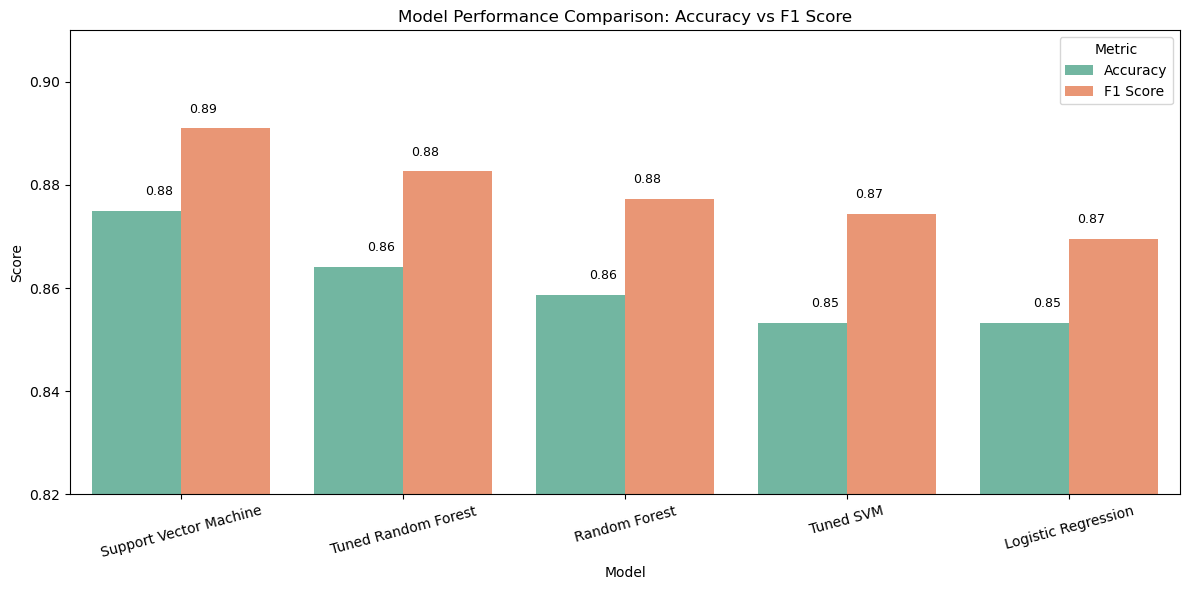

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your model results
data = {
    'Model': ['Support Vector Machine', 'Tuned Random Forest', 'Random Forest', 'Tuned SVM', 'Logistic Regression'],
    'Accuracy': [0.875000, 0.864130, 0.858696, 0.853261, 0.853261],
    'F1 Score': [0.890995, 0.882629, 0.877358, 0.874419, 0.869565]
}
df = pd.DataFrame(data)

# Melt the DataFrame for grouped bar plot
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')

# Annotate bars
for i in range(len(df)):
    for j, metric in enumerate(['Accuracy', 'F1 Score']):
        value = df.loc[i, metric]
        plt.text(i + (j - 0.5) * 0.2, value + 0.003, f"{value:.2f}", ha='center', fontsize=9)

plt.title("Model Performance Comparison: Accuracy vs F1 Score")
plt.ylabel("Score")
plt.ylim(0.82, 0.91)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()